# Regressor Class
This class wraps 3 kinds of Reggresion classes **LinearRegression, DecisionTreeRegressor, KNeighborsRegressor**.
it can also do polynomial reggression from **PolynomialFeatures** 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

class Regressor:
    def __init__(self, method, **kwargs):

        self.RegressorType = method

        if(method == 'LINEAR' or 'POLY'):
            self.clf = LinearRegression()

            # take default degree as 2 if none was given
            if 'degree' in kwargs:
                self.degree = kwargs['degree']
            else:
                self.degree = 2 

        elif(method == 'DTREE'):
            self.clf = DecisionTreeRegressor()
        elif(method == 'KNN'):
            self.clf = KNeighborsRegressor()       
        else:
            #picking linearReg as default regression if input invalid
            self.RegressorType = 'LINEAR'
            self.clf = LinearRegression()

    def fit(self, X_train, y_train):
        if(self.RegressorType != 'POLY'):
            self.clf.fit(X_train, y_train)
        else:
            poly = PolynomialFeatures(degree=self.degree)
            X_poly = poly.fit_transform(X_train)
            self.clf.fit(X_poly, y_train)
            

    def predict(self, X_test):
        if(self.RegressorType != 'POLY'):
            return self.clf.predict(X_test)
        else:
            poly = PolynomialFeatures(degree=self.degree)
            X_test_poly = poly.fit_transform(X_test)
            return self.clf.predict(X_test_poly)

    def score(self, X_test, y_test):
        if(self.RegressorType != 'POLY'):
            return self.clf.score(X_test, y_test)
        else:
            poly = PolynomialFeatures(degree=self.degree)
            X_test_poly = poly.fit_transform(X_test)
            return self.clf.score(X_test_poly, y_test)

### Parameters

**method**: String, (default = LINEAR)

- LINEAR: uses linear reggresion
- POLY: performs polynomial reggresion
- DTREE: uses decision tree reggresion
- KNN: uses k neareast neigbours reggresion


**degree**: int, **optional**, default: 2.

> - degree of polynomial regression if it is choosen.

##  fit(self, X_train, y_train)
Fit linear model.

### Parameters


**X_train**: {array-like, sparse matrix} of shape (n_samples, n_features)

> - Training data


**y_train**: array-like of shape (n_samples,) or (n_samples, n_targets)

> - Target values. Will be cast to X’s dtype if necessary

##  predict(self, X_test)
Predict using the linear model.

### Parameters



**X_test**: array_like or sparse matrix, shape (n_samples, n_features)

> - Samples.

**returns**: array, shape (n_samples,) predicted values for X_test.


##  score(self, X_test, y_test)
Return the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

### Parameters


**X_test**: array-like of shape (n_samples, n_features)

> - Test samples. For some estimators this may be a precomputed kernel matrix or a list of generic objects instead, shape = (n_samples, n_samples_fitted), where n_samples_fitted is the number of samples used in the fitting for the estimator.



**y_test**: array-like of shape (n_samples,) or (n_samples, n_outputs)

> - True values for X_test.

**returns**: float R^2 of self.predict(X_test) wrt. y_test.

## Example

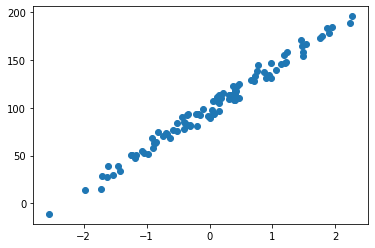

array([113.71818622, 123.25278786,  89.3532449 ,  84.38474488,
        38.60546871, 110.23441629,  84.92706996, 111.66073836,
       146.63838332, 117.22758983,  80.73145302, 144.37598802,
        90.84876885,  76.77350711, 114.30517408,  75.44090138,
        94.03841437,  92.53900523, 158.50697902, 129.19781434])

In [4]:
X, y = make_regression(n_samples=100, n_features=1, random_state=0, noise=5.0, bias=100.0)
plt.scatter(X,y)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = Regressor('POLY', degree=3)
clf.fit(X_train, y_train)
clf.predict(X_test)
y_test

In [5]:
clf.score(X_test, y_test)

0.9542561469194448